In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
%cd '/content/drive/MyDrive/4th year/Parallel Optimization/ParallelOptimizationFinalProject'

/content/drive/MyDrive/4th year/Parallel Optimization/ParallelOptimizationFinalProject


In [33]:
!pip install ply

In [34]:
!ls

helper_file.c	       parsing_yacc.py	   python_test_again.ipynb	 README.md
parser.out	       proj_test2.ipynb    pythonToC.py			 results.csv
parsetab.py	       proj_testing.ipynb  pythonToC_testing.ipynb	 side_testing.ipynb
parsing_lex.py	       Py2Py_Test.ipynb    pythonTopython2.py		 test.c
parsing_testing.ipynb  __pycache__	   pythonToPython_testing.ipynb  test.py


In [35]:
import numpy as np
import pythonToC
import parsing_yacc
from parsing_lex import MyLexer
import pythonTopython2
import time
import pandas as pd
import matplotlib.pyplot as plt

def measure_execution_time(input_code, mode):
    start_time = time.time()
    output = deploy_parser(input_code, mode)
    execution_time = time.time() - start_time
    return output, execution_time

def deploy_parser(input, mode):
    output = ""

    for line in input.split("\n"):
        if line == "":
            continue
        result = parsing_yacc.main(line, mode)
        if isinstance(result, str):
            output += result + "\n"

    print(output)
    return output

def create_input_code(arr_len):
    # Create a list of values with length arr_len
    a_values = np.random.randint(1, 100, arr_len)
    a_values = a_values.tolist()
    b_values = np.random.randint(1, 100, arr_len)
    b_values = b_values.tolist()

    # Create a string with the code to be executed
    # print(str(a_values)[1:-1])
    code = """
a = np.array([%s])
b = np.array([%s])

c = np.add(a, b)
d = np.subtract(a, b)
e = np.sum(a)
f = np.dot(a, b)""" % (str(a_values)[1:-1], str(b_values)[1:-1])

    return code

def run_trials(trials, array_lengths):
    results = []
    for trial in range(trials):
        for array_length in array_lengths:
            input_code = create_input_code(array_length)
            c_output, c_time = measure_execution_time(input_code, "C")
            python_output, python_time = measure_execution_time(input_code, "Python")
            results.append((trial, array_length, c_time, python_time))
    return results

# Create an instance of MyLexer
lexer = MyLexer()

# Build the lexer
lexer.build()

# Test the lexer on the input code
input_code = """
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

c = np.add(a, b)
d = np.subtract(a, b)
e = np.sum(a)
f = np.dot(a, b)
"""
lexer.test(input_code)

trials = 3
array_lengths = [5, 10, 50, 100, 500, 1000]

results = run_trials(trials, array_lengths)

# print(results)

# # Print the results
# for result in results:
#     print("Trial:", result[0])
#     print("Array Length:", result[1])
#     print("C Code Generation Time:", result[2])
#     print("Python Code Generation Time:", result[3])
#     print()

# Construct a DataFrame from results
results_df = pd.DataFrame(results, columns=["Trial", "Array Length", "C Code Generation Time", "Python Code Generation Time"])

results_df.to_csv('results.csv', index=False)

display(results_df)


LexToken(VARIABLE,'a',1,1)
LexToken(EQUALS,'=',1,3)
LexToken(ARRAY,'np.array',1,5)
LexToken(LPAREN,'(',1,13)
LexToken(LIST,'[1, 2, 3]',1,14)
LexToken(RPAREN,')',1,23)
LexToken(VARIABLE,'b',1,25)
LexToken(EQUALS,'=',1,27)
LexToken(ARRAY,'np.array',1,29)
LexToken(LPAREN,'(',1,37)
LexToken(LIST,'[4, 5, 6]',1,38)
LexToken(RPAREN,')',1,47)
LexToken(VARIABLE,'c',1,50)
LexToken(EQUALS,'=',1,52)
LexToken(NP_ADD,'np.add',1,54)
LexToken(LPAREN,'(',1,60)
LexToken(VARIABLE,'a',1,61)
LexToken(COMMA,',',1,62)
LexToken(VARIABLE,'b',1,64)
LexToken(RPAREN,')',1,65)
LexToken(VARIABLE,'d',1,67)
LexToken(EQUALS,'=',1,69)
LexToken(NP_SUBTRACT,'np.subtract',1,71)
LexToken(LPAREN,'(',1,82)
LexToken(VARIABLE,'a',1,83)
LexToken(COMMA,',',1,84)
LexToken(VARIABLE,'b',1,86)
LexToken(RPAREN,')',1,87)
LexToken(VARIABLE,'e',1,89)
LexToken(EQUALS,'=',1,91)
LexToken(NP_SUM,'np.sum',1,93)
LexToken(LPAREN,'(',1,99)
LexToken(VARIABLE,'a',1,100)
LexToken(RPAREN,')',1,101)
LexToken(VARIABLE,'f',1,103)
LexToken(EQUALS,'=',1

,Trial,Array Length,C Code Generation Time,Python Code Generation Time
0,0,5,0.023050,0.003470
1,0,10,0.009536,0.002499
2,0,50,0.009907,0.002935
3,0,100,0.009635,0.002587
4,0,500,0.008826,0.004159
5,0,1000,0.009387,0.003408
6,1,5,0.009388,0.002498
7,1,10,0.008415,0.002889
8,1,50,0.010488,0.002615
9,1,100,0.012503,0.004700


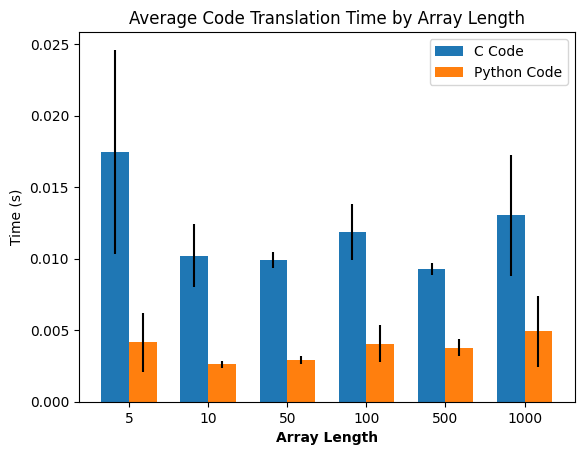

In [36]:
# Make a bar chart

grouped = results_df.groupby('Array Length').agg([np.mean, np.std])
grouped

import matplotlib.pyplot as plt
import numpy as np

# Define bar width
bar_width = 0.35

# Define positions of the left bar boundaries
r1 = np.arange(len(grouped))

fig, ax = plt.subplots()

# Plot 'C Code Generation Time'
rects1 = ax.bar(r1 - bar_width/2, grouped[('C Code Generation Time', 'mean')], bar_width, yerr=grouped[('C Code Generation Time', 'std')], label='C Code')

# Plot 'Python Code Generation Time'
rects2 = ax.bar(r1 + bar_width/2, grouped[('Python Code Generation Time', 'mean')], bar_width, yerr=grouped[('Python Code Generation Time', 'std')], label='Python Code')

# Add xticks on the middle of the group bars
plt.xlabel('Array Length', fontweight='bold')
plt.xticks([r for r in range(len(grouped))], grouped.index)

# Label axes
plt.ylabel('Time (s)')
plt.ylim(bottom=0)

# Set a title
plt.title('Average Code Translation Time by Array Length')

# Create legend & Show graphic
plt.legend()
plt.show()
